# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

## Уровень 0:

- Задание 1:

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

In [26]:
from scipy.stats import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

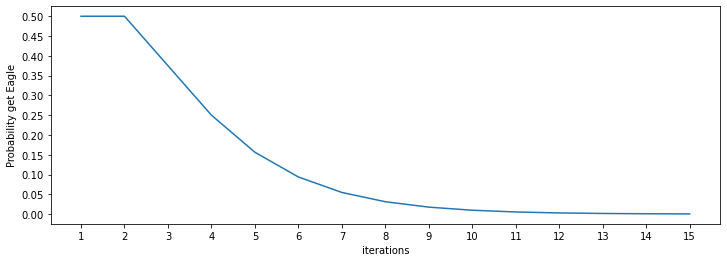

In [85]:
n = np.arange(1,16,1)
p = 0.5

probabilities = binom.pmf(1,n, .5)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
plt.plot(n,probabilities)

ax.set(xlabel = 'iterations' ,ylabel = 'Probability get Eagle', xticks=np.arange(1,16,1), yticks = np.arange(0,0.51, .05) );


- Задание 2:


Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [91]:
#Создайте свою дискретную случайную величину с не менее, чем 10 значениями.
x = binom.rvs(100, 0.53, size= 100)
probabilities = np.random.random(100)
probabilities = probabilities / probabilities.sum()

np.random.choice(x,10 ,p=probabilities)

array([50, 61, 55, 59, 49, 55, 55, 57, 51, 56])

In [122]:
#Просемплируйте 1000 случайных значений
x = np.random.poisson( 20, 1000 )

probabilities = np.random.random(1000)
probabilities = probabilities / probabilities.sum()

x = np.random.choice(x, 1000 ,p=probabilities)

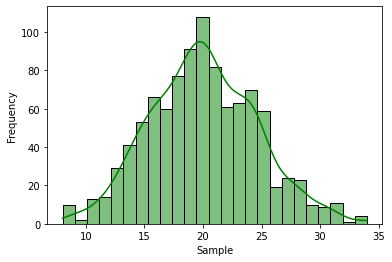

In [155]:
#постройте гистограмму плотности распределения по выборке
ax =sns.histplot(x, kde=True, bins=25, color = 'green' )
ax.set(xlabel = 'Sample' ,ylabel = 'Frequency' );

In [125]:
#посчитайте среднее, дисперсию и медиану.
print(f' Среднее = {np.mean(s):.3f}, медиана = {np.median(s)}, дисперсия = {np.std(s)**2 :.3f} ')

 Среднее = 5.054, медиана = 5.0, дисперсия = 5.031 


## Уровень 1:

- Задание 3:


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [133]:
# Вероятность 1 монеты получить 'орла' // или 'решку'
coins = 1
times_to_get_heads = 1
probability_1_coin = binom.pmf( times_to_get_heads, coins , .5)
probability_1_coin

0.5

In [134]:
# Вероятность 2х монет одновременно получить 'орла' // или 'решку'
coins = 2
times_to_get_heads = 2
probability_2_coin = binom.pmf( times_to_get_heads, coins , .5)
probability_2_coin

0.25

In [135]:
# Вероятность 3х монет одновременно получить 'орла' // или 'решку'
coins = 3
times_to_get_heads = 3
probability_3_coin = binom.pmf( times_to_get_heads, coins , .5)
probability_3_coin

0.12500000000000003

[Text(0.5, 0, 'No. of coins that the same heads or tails'),
 Text(0, 0.5, 'Probability')]

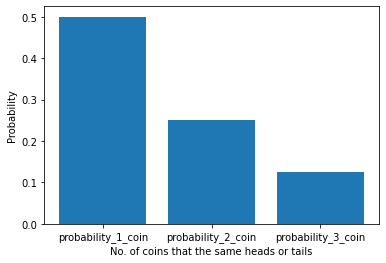

In [144]:
fig, ax = plt.subplots()
ax.bar(['probability_1_coin', 'probability_2_coin', 'probability_3_coin'] ,
        [probability_1_coin, probability_2_coin, probability_3_coin])
ax.set(xlabel = 'No. of coins that the same heads or tails', ylabel = 'Probability')

### По графику видно, 
что с увеличением числа совпадений колчество степеней свободы системы уменьшается - система становится более закреплена ( less flexible). => Стало быть события связаны 

## - Задание 4 (формула полной вероятности):


В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [146]:
# Используем формулу P(A) = m/n
# тогда нужно найти все достоверные исходы - n и все благоприятствующие исходы - m
# Найдем вероятность получить кач. продукт на 1 предприятии и по аналогии сделаем для остальных:
probability_get_1_plant = 20/100
guality_rate_1_plant = 10/100

probability_get_quality_1_plant = probability_get_1_plant * guality_rate_1_plant
probability_get_quality_1_plant

0.020000000000000004

In [148]:
# 2nd plant
probability_get_2_plant = 30/100
guality_rate_2_plant = 5/100
probability_get_quality_2_plant = probability_get_2_plant * guality_rate_2_plant

# 3rd plant
probability_get_3_plant = 50/100
guality_rate_3_plant = 20/100
probability_get_quality_3_plant = probability_get_3_plant * guality_rate_3_plant

probability_get_quality_2_plant, probability_get_quality_3_plant

(0.015, 0.1)

In [149]:
#overall probability
probability_get_quality_from_1_2_3_plants = probability_get_quality_1_plant + probability_get_quality_2_plant +probability_get_quality_3_plant
probability_get_quality_from_1_2_3_plants

0.135

In [153]:
print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта = { probability_get_quality_from_1_2_3_plants *100} %')

Вероятность того, что случайно купленная новая продукция окажется высшего сорта = 13.5 %
